In [6]:
import sys
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl

df = pd.read_excel(r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\AVATAR_SDSBD총정리.xlsx')
filtered_df = df[df['원교님분석사용,SI=1기준'] == 'susceptible']
my_dict = dict(zip(filtered_df['mouse_name'], filtered_df['SIratio-postSD']))
print(my_dict)

{102: 0.922203, 103: 0.881327, 106: 0.922504, 107: 0.657534, 108: 0.287469, 111: 0.187187, 113: 0.384673, 114: 0.30692, 115: 0.659213, 202: 0.911846, 203: 0.400973, 212: 0.341958, 214: 0.24345, 218: 0.311278, 219: 0.302909, 301: 0.3013105560569491, 302: 0.8291034158181775, 304: 0.9996324028764787, 307: 0.2346704871060172, 309: 0.7710254981027433, 310: 0.16270030576569652, 312: 0.8871441244863113, 313: 0.19346015351143012, 314: 0.8609548981025454, 315: 0.9557253209762014, 416: 0.430005958612471, 417: 0.14553133333966048, 418: 0.8874184465580061}


c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


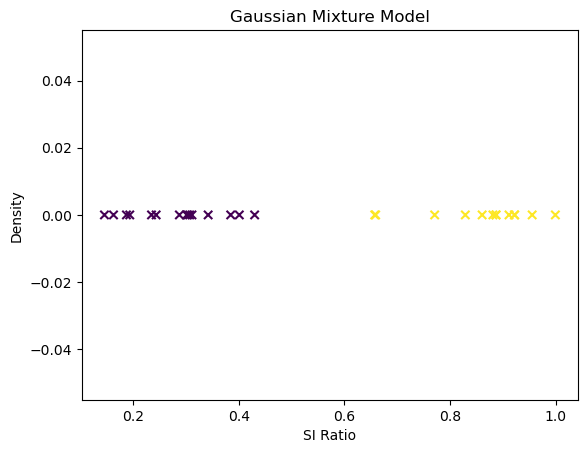

In [7]:
# my_dict에서 SI ratio 값들을 추출
si_ratios = list(my_dict.values())

# numpy 배열로 변환
data = np.array(si_ratios).reshape(-1, 1)

# GMM 모델 정의 및 학습
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# 각 데이터 포인트가 어느 분포에 속하는지 예측
labels = gmm.predict(data)

# 결과 시각화
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', marker='x')
plt.title("Gaussian Mixture Model")
plt.xlabel("SI Ratio")
plt.ylabel("Density")
plt.show()

c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


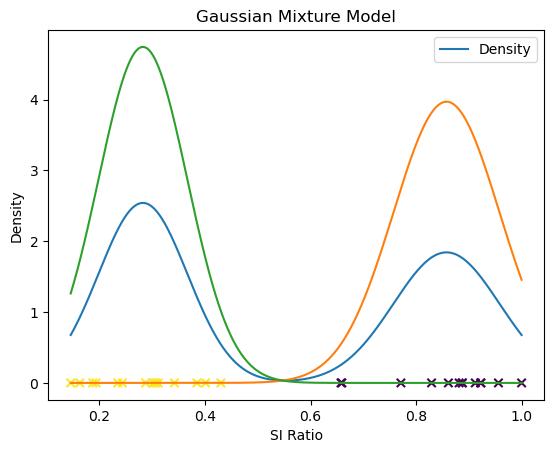

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# 데이터 준비 (예시)
data = np.array(si_ratios).reshape(-1, 1)

# GMM 적용
gmm = GaussianMixture(n_components=2)
gmm.fit(data)
labels = gmm.predict(data)

# 데이터 밀도 플롯
x = np.linspace(np.min(data), np.max(data), 1000)
densities = gmm.score_samples(x.reshape(-1, 1))

# 각 분포에 대한 평균과 분산
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()

# 결과 시각화
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', marker='x')
plt.plot(x, np.exp(densities), label='Density')
for mean, var in zip(means, variances):
    plt.plot(x, norm.pdf(x, mean, np.sqrt(var)))

plt.title("Gaussian Mixture Model")
plt.xlabel("SI Ratio")
plt.ylabel("Density")
plt.legend()
plt.show()


In [9]:
# 원본 데이터에서 mouse_name 추출
mouse_names = filtered_df['mouse_name'].values

# mouse_name과 GMM 레이블 매핑
label_mapping = dict(zip(mouse_names, labels))

for mouse, label in label_mapping.items():
    print(f"Mouse {mouse}: Label {label}")


Mouse 102: Label 0
Mouse 103: Label 0
Mouse 106: Label 0
Mouse 107: Label 0
Mouse 108: Label 1
Mouse 111: Label 1
Mouse 113: Label 1
Mouse 114: Label 1
Mouse 115: Label 0
Mouse 202: Label 0
Mouse 203: Label 1
Mouse 212: Label 1
Mouse 214: Label 1
Mouse 218: Label 1
Mouse 219: Label 1
Mouse 301: Label 1
Mouse 302: Label 0
Mouse 304: Label 0
Mouse 307: Label 1
Mouse 309: Label 0
Mouse 310: Label 1
Mouse 312: Label 0
Mouse 313: Label 1
Mouse 314: Label 0
Mouse 315: Label 0
Mouse 416: Label 1
Mouse 417: Label 1
Mouse 418: Label 0
